# 날씨데이터 EDA

몇월달에 주로 생산되는지 파악해야함
temp1 = df[df['stdmtcnewnm'].str.contains('전라', regex=False, case=False, na=False)]
temp1_1 = temp1[
    #경매구분코드
    (temp1['aucsecode'] == 1)
    #품종코드
    & (
          (temp1['stdspciesnewcode'] == 100101)
        | (temp1['stdspciesnewcode'] == 100102)
        | (temp1['stdspciesnewcode'] == 100103)
        | (temp1['stdspciesnewcode'] == 100104)
        | (temp1['stdspciesnewcode'] == 100105)
        | (temp1['stdspciesnewcode'] == 100106)
    )
    #시장코드
    & (
          (temp1['whsalmrktcode'] == 110001)
        | (temp1['whsalmrktcode'] == 210001)
        | (temp1['whsalmrktcode'] == 220001)
      )
]
f, ax = plt.subplots(figsize=(20, 4))
temp1_1[['yyyymm','totalweight']].groupby("yyyymm").sum().sort_values(by='yyyymm', ascending=False)[0:30].plot.bar(ax=ax)
전라남도 기준
11월 ~ 5월달 판매됨

temp2 = df[df['stdmtcnewnm'].str.contains('강원도', regex=False, case=False, na=False)]
temp2_1 = temp2[
    #경매구분코드
    (temp2['aucsecode'] == 1)
    #품종코드
    & (
          (temp2['stdspciesnewcode'] == 100101)
        | (temp2['stdspciesnewcode'] == 100102)
        | (temp2['stdspciesnewcode'] == 100103)
        | (temp2['stdspciesnewcode'] == 100104)
        | (temp2['stdspciesnewcode'] == 100105)
        | (temp2['stdspciesnewcode'] == 100106)
    )
    #시장코드
    & (
          (temp2['whsalmrktcode'] == 110001)
        | (temp2['whsalmrktcode'] == 210001)
        | (temp2['whsalmrktcode'] == 220001)
      )
]
f, ax = plt.subplots(figsize=(20, 4))
temp2_1[['yyyymm','totalweight']].groupby("yyyymm").sum().sort_values(by='yyyymm', ascending=False)[0:30].plot.bar(ax=ax)
강원도 기준
6월 ~ 11월 9월이 피크임

- 주요 생산지
 - 봄배추 : 경기 평택/포천, 충북 청원, 충남 예산
 - 고랭지 배추 : 강원 강릉/태백/삼천/정선
 - 가을배추 : 충북 제천, 전북 고창, 전남 나주
 - 겨울배추 : 전남 해남/진도, 제주도

- 지점
    - 261 : 해남
    - 105 : 강릉
    - 216 : 태백
    - 217 : 정선
- 지점의 근거는 농수산데이터의 EDA를 기반으로 함   

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')

#경고 끄기
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 확인

In [2]:
df = pd.read_csv('20082018.csv')

In [3]:
print(df.columns)

Index(['지점', '일시', '평균기온(°C)', '최저기온(°C)', '최저기온 시각(hhmi)', '최고기온(°C)',
       '최고기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다 강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다 강수량 시각(hhmi)', '일강수량(mm)', '최대 순간 풍속(m/s)',
       '최대 순간 풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '최소 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 증기압(hPa)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다일사 시각(hhmi)', '1시간 최다일사량(MJ/m2)', '합계 일사(MJ/m2)',
       '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)', '일 최심적설 시각(hhmi)',
       '합계 3시간 신적설(cm)', '평균 전운량(1/10)', '평균 중하층운량(1/10)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)',

### 쓸만한 컬럼 목록

- 기온, 일조량, 강수량, 풍속
- 기온관련
    - 평균기온(°C)
    - 최저기온(°C)
    - 최고기온(°C)
- 일조량
    - 합계 일조 시간(hr)
- 강수량
    - 강수 계속시간(hr)
    - 1시간 최다강수량(mm)
    - 일강수량(mm)
- 풍속
    - 최대 풍속(m/s)
    - 평균 풍속(m/s)

In [4]:
df.loc[(df['지점'] == 261),(
    '지점'
    ,'일시'
    ,'평균기온(°C)'
    ,'최저기온(°C)'
    ,'최고기온(°C)'
    ,'합계 일조 시간(hr)'
    ,'강수 계속시간(hr)'
    ,'1시간 최다강수량(mm)'
    ,'일강수량(mm)'
    ,'최대 풍속(m/s)'
    ,'평균 풍속(m/s)'
)].head()

,지점,일시,평균기온(°C),최저기온(°C),최고기온(°C),합계 일조 시간(hr),강수 계속시간(hr),1시간 최다강수량(mm),일강수량(mm),최대 풍속(m/s),평균 풍속(m/s)
9991,261,2008-01-01,0.2,-1.5,2.3,3.4,NaN,NaN,0.5,7.0,4.1
9992,261,2008-01-02,2.4,0.0,4.3,0.9,NaN,NaN,NaN,5.6,3.0
9993,261,2008-01-03,2.2,-2.5,8.7,4.8,NaN,NaN,NaN,6.1,1.8
9994,261,2008-01-04,1.0,-4.6,7.8,8.9,NaN,NaN,NaN,4.7,1.4
9995,261,2008-01-05,1.5,-3.9,8.8,8.0,NaN,NaN,NaN,5.2,1.1


## 데이터 가공

In [5]:
df['yyyy'] = df['일시'].apply(lambda x: str(x)[0:4])
df['mm'] = df['일시'].apply(lambda x: str(x)[5:7])
df['dd'] = df['일시'].apply(lambda x: str(x)[8:10])
df['yyyymm'] = df['일시'].apply(lambda x: str(x)[0:4]+str(x)[5:7])
df['yyyymm'] = df['yyyymm'].apply(lambda x: int(x))
df = df.sort_values(["yyyymm"], ascending=[True])

In [6]:
df['일교차'] = df['최고기온(°C)'] - df['최저기온(°C)']

## EDA

### 온도확인

#### 일교차

### 일조량

### 강수량

- 강수 계속시간(hr)
- 1시간 최다강수량(mm)
- 일강수량(mm)

- 폭우
    - 시간당 7.6㎜ 이상 내리는 비


- 호우
    - 주의보 : 3시간 강우량이 60mm이상 예상되거나 12시간 강우량이 110mm이상
    - 경보 : 3시간 강우량이 90mm이상 예상되거나 12시간 강우량이 180mm이상

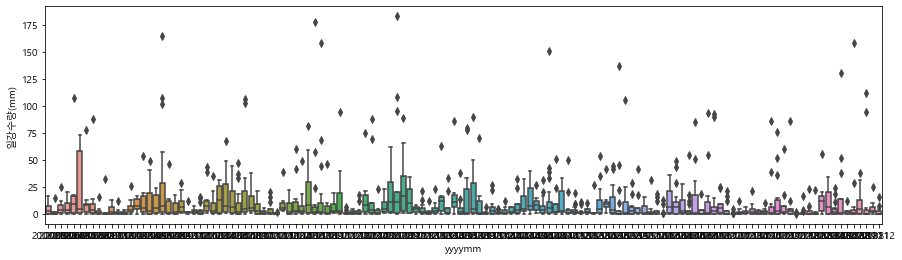

In [7]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='일강수량(mm)', data=df.loc[(df['지점'] == 261)])

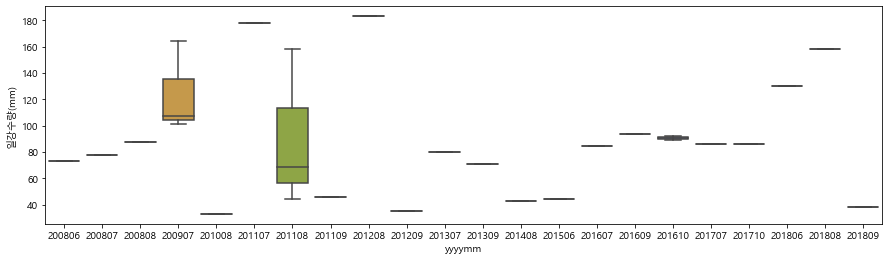

In [8]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='일강수량(mm)'
                  , data=df.loc[(df['지점'] == 261)
                               & (df['1시간 최다강수량(mm)'] > 30)])

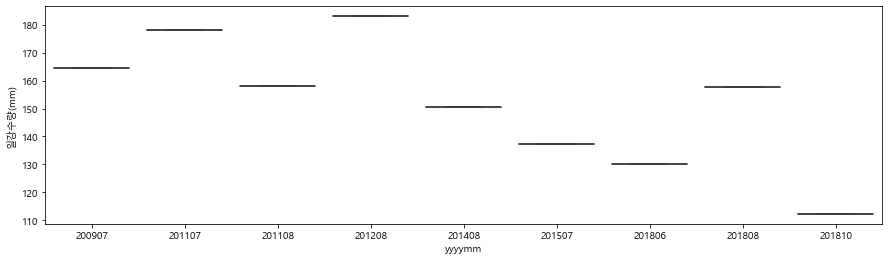

In [9]:
# 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='일강수량(mm)'
                  , data=df.loc[(df['지점'] == 261)
                               & (df['일강수량(mm)'] > 110)])

In [10]:
df.loc[(df['지점'] == 261) & (df['일강수량(mm)'] > 110)]

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr),yyyy,mm,dd,yyyymm,일교차
10552,261,2009-07-15,22.8,19.4,748.0,27.8,0.0,NaN,13.5,426.0,...,NaN,NaN,NaN,NaN,NaN,2009,07,15,200907,8.4
11276,261,2011-07-09,23.6,21.0,1809.0,26.3,331.0,NaN,13.5,1209.0,...,NaN,NaN,NaN,NaN,NaN,2011,07,09,201107,5.3
11305,261,2011-08-07,26.8,24.4,1631.0,29.1,548.0,NaN,13.5,1430.0,...,NaN,NaN,NaN,NaN,NaN,2011,08,07,201108,4.7
11692,261,2012-08-28,24.4,23.2,1818.0,26.2,854.0,NaN,7.5,239.0,...,NaN,NaN,NaN,NaN,NaN,2012,08,28,201208,3.0
12396,261,2014-08-02,25.4,23.6,924.0,28.1,457.0,NaN,5.5,1158.0,...,NaN,NaN,NaN,NaN,NaN,2014,08,02,201408,4.5
12740,261,2015-07-12,24.0,21.5,2327.0,25.5,855.0,NaN,7.6,946.0,...,NaN,NaN,NaN,NaN,NaN,2015,07,12,201507,4.0
14917,261,2018-06-28,22.8,21.8,437.0,25.2,1525.0,NaN,19.3,325.0,...,NaN,NaN,NaN,NaN,NaN,2018,06,28,201806,3.4
14973,261,2018-08-23,25.2,23.9,2046.0,28.2,14.0,NaN,9.2,1401.0,...,NaN,NaN,NaN,NaN,NaN,2018,08,23,201808,4.3
15017,261,2018-10-06,19.3,17.0,2346.0,21.3,147.0,NaN,5.2,321.0,...,NaN,NaN,NaN,NaN,NaN,2018,10,06,201810,4.3


In [11]:
df.loc[(df['지점'] == 261) & (df['일교차'] > 10), 
    ('강수 계속시간(hr)'
    ,'1시간 최다강수량(mm)'
    ,'일강수량(mm)')]

,강수 계속시간(hr),1시간 최다강수량(mm),일강수량(mm)
9993,NaN,NaN,NaN
9994,NaN,NaN,NaN
9995,NaN,NaN,NaN
9996,NaN,NaN,NaN
9997,NaN,NaN,NaN
9999,NaN,NaN,NaN
10000,NaN,NaN,NaN
10009,NaN,NaN,NaN
10017,NaN,NaN,NaN
10032,NaN,NaN,NaN


### 풍속

- 태풍
    - 강풍(또는 풍랑) 경보 기준에 도달할 것으로 예상될 때 
    - 총 강우량이 200mm이상 예상될 때
- 강풍
- 주의보
    - 육상에서 풍속 14m/s 이상 또는 순간풍속 20m/s 이상이 예상될 때
    - 다만, 산지는 풍속 17m/s 이상 또는 순간풍속 25m/s 이상이 예상될 때
- 경보
    - 육상에서 풍속 21m/s 이상 또는 순간풍속 26m/s 이상이 예상될 때
    - 다만, 산지는 풍속 24m/s 이상 또는 순간풍속 30m/s 이상이 예상될 때

#### 최대풍속

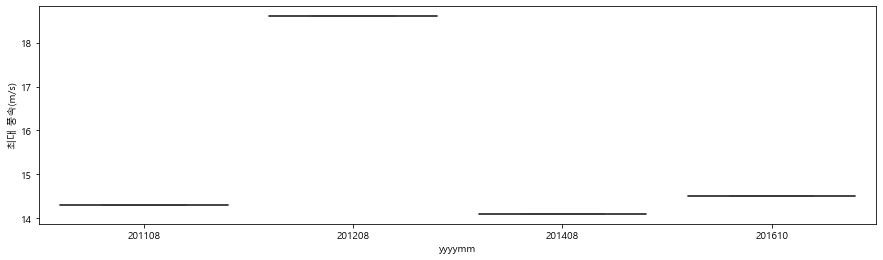

In [12]:
# 261 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 261) & (df['최대 풍속(m/s)'] > 14)])

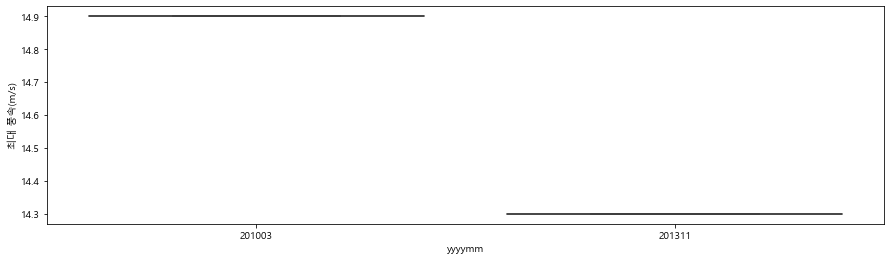

In [13]:
# 105 : 강릉
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 105) & (df['최대 풍속(m/s)'] > 14)])

ValueError: min() arg is an empty sequence

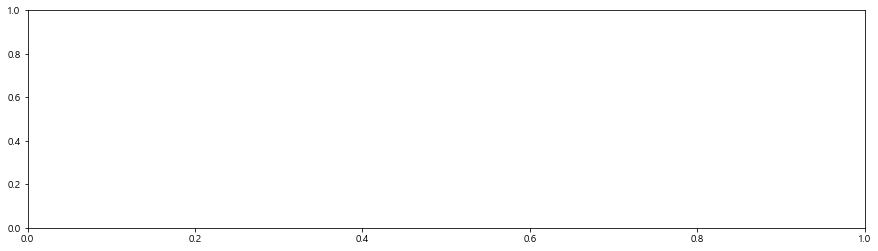

In [14]:
# 216 : 태백
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 216) & (df['최대 풍속(m/s)'] > 14)])

In [ ]:
# 217 : 정선
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 217) & (df['최대 풍속(m/s)'] > 14)])

In [ ]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='최대 풍속(m/s)', data=df.loc[(df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217) & (df['최대 풍속(m/s)'] > 14)])

#### 평균풍속

In [ ]:
# 261 해남
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 261)])

In [ ]:
# 105 : 강릉
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 105)])

In [ ]:
# 216 : 태백
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 216)])

In [ ]:
# 217 : 정선
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 217)])

In [ ]:
# 강원도 3지역 합침
f, ax = plt.subplots(figsize=(15, 4))
fig = sns.boxplot(x='yyyymm', y='평균 풍속(m/s)', data=df.loc[(df['지점'] == 105) | (df['지점'] == 216) | (df['지점'] == 217)])